In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(12,8)})

In [4]:
df = pd.read_csv('Games.csv')
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


## Most popular genre

In [6]:
df_by_genre = df.groupby('Genre',as_index=False)['Sales'].sum()
df_by_genre= df_by_genre.sort_values(by='Sales',ascending=False)
df_by_genre

,Genre,Sales
1,Action role-playing,58.1
39,Real-time strategy,55.0
12,Battle royale,52.0
22,First-person shooter,46.0
45,"Sandbox, survival",33.0
...,...,...
40,"Real-time strategy, grand strategy wargame",1.0
33,Platform,1.0
38,Rail shooter,1.0
34,Point-and-click,1.0


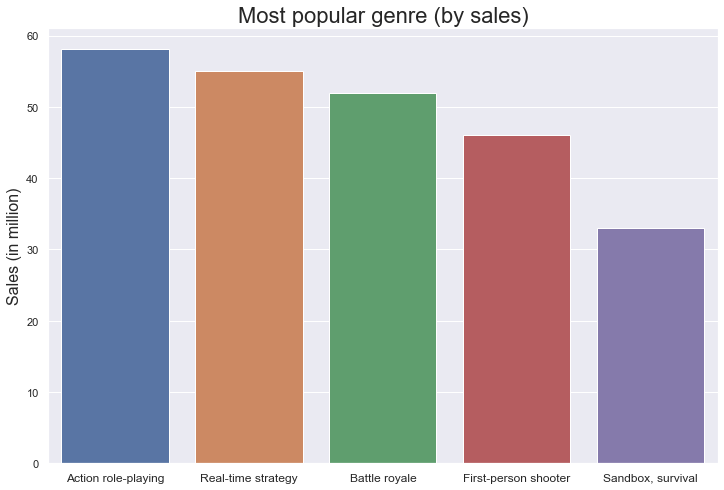

In [7]:
plot_limit = df.groupby('Genre')['Sales'].sum().sort_values(ascending=False).index.values
sns.barplot(x='Genre', y='Sales',data=df_by_genre,order=plot_limit[0:5])
plt.ylabel("Sales (in million)",fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.title("Most popular genre (by sales)",fontsize=22)
plt.show()

Action role-playing is the most popular genre (by sales)

## Publisher With Most Games

In [8]:
publish =df['Publisher'].value_counts(ascending=False)
publish = publish[0:5]
publish

Electronic Arts           19
Blizzard Entertainment     8
Paradox Interactive        7
Activision                 6
GT Interactive             5
Name: Publisher, dtype: int64

C:\Users\Waqas\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


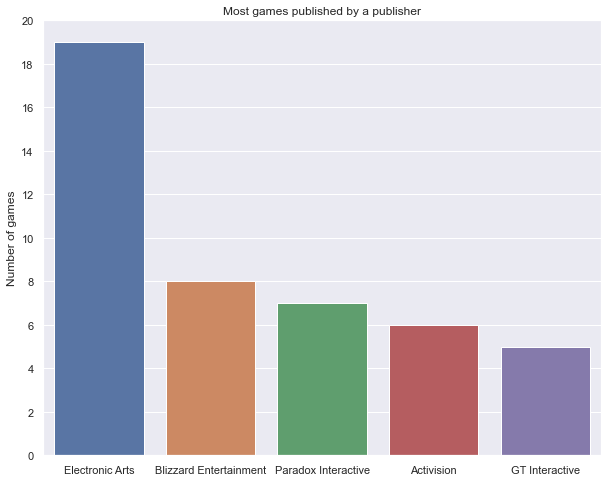

In [9]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(publish.index, publish.values)
plt.title('Most games published by a publisher')
plt.ylabel('Number of games')
plt.yticks(ticks=[0,2,4,6,8,10,12,14,16,18,20])
plt.show()

EA published the most number of games

## Developer With Most Games

In [10]:
develop =df['Developer'].value_counts(ascending=False)
develop = develop[0:5]
develop

Blizzard Entertainment        8
Maxis                         6
Paradox Development Studio    5
id Software                   4
Westwood Studios              4
Name: Developer, dtype: int64

C:\Users\Waqas\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


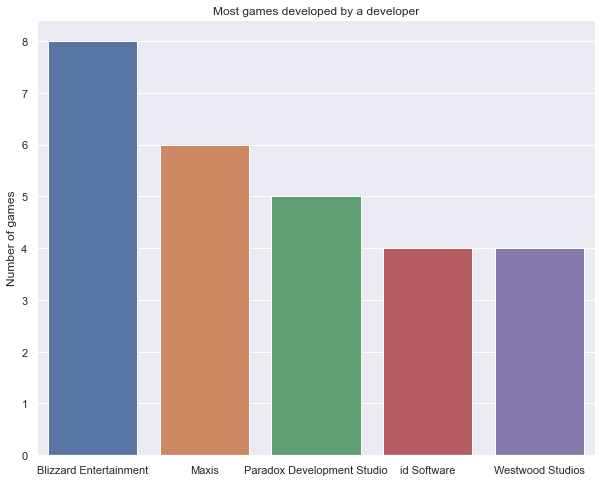

In [11]:
sns.barplot(develop.index, develop.values)
plt.title('Most games developed by a developer')
plt.ylabel('Number of games')
plt.show()

Blizzard Entertainment developed the most number of games

## Most popular series

In [12]:
popular_series = df.groupby('Series')['Sales'].sum()
popular_series=popular_series.sort_values(ascending=False)[0:5]

C:\Users\Waqas\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


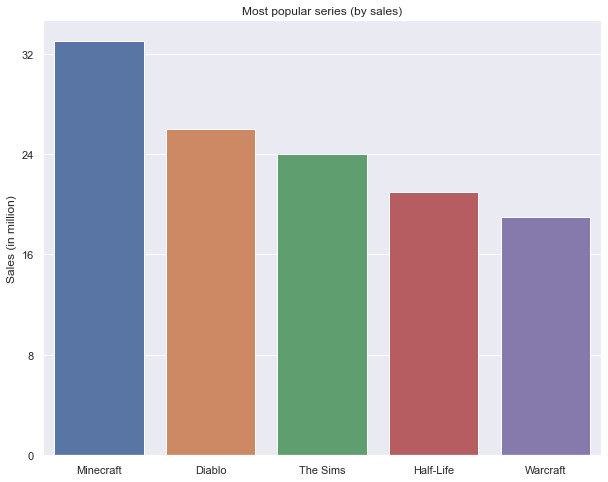

In [13]:
sns.barplot(popular_series.index, popular_series.values)
plt.title('Most popular series (by sales)')
plt.ylabel('Sales (in million)')
plt.xlabel('')
plt.yticks(ticks=[0,8,16,24,32])
plt.show()

Minecraft is the most popular series

## Top Selling Games

In [14]:
df_sorted =df.sort_values(by='Sales',ascending=False)
df_sorted.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic


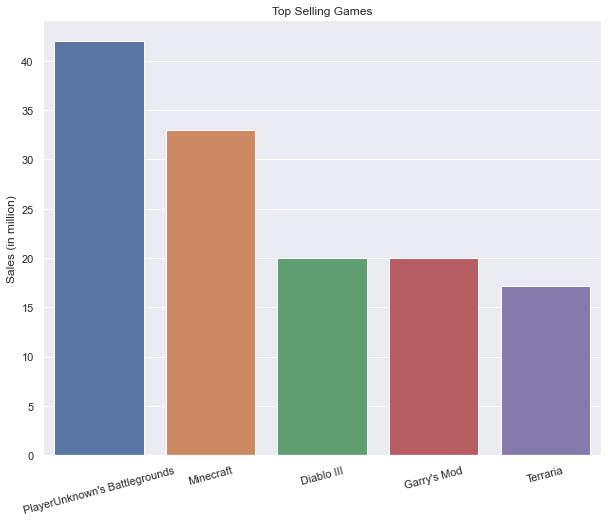

In [15]:
sns.barplot(x='Name',y='Sales',data=df_sorted[0:5])
plt.ylabel("Sales (in million)")
plt.xticks(rotation=15)
plt.xlabel('')
plt.title("Top Selling Games")
plt.show()

PlayerUnknown's Battlegrounds is the top selling game

## Top Selling Publisher

In [16]:
df_by_publisher = df.groupby('Publisher',as_index=False)['Sales'].sum()
df_by_publisher = df_by_publisher.sort_values(by='Sales',ascending=False)
df_by_publisher

,Publisher,Sales
8,Blizzard Entertainment,59.0
28,Electronic Arts,54.0
51,Krafton,42.0
59,Mojang Studios,33.0
89,Valve,20.0
...,...,...
41,Hasbro Interactive,1.0
47,Introversion Software,1.0
53,Larian Studios,1.0
71,Softstar,1.0


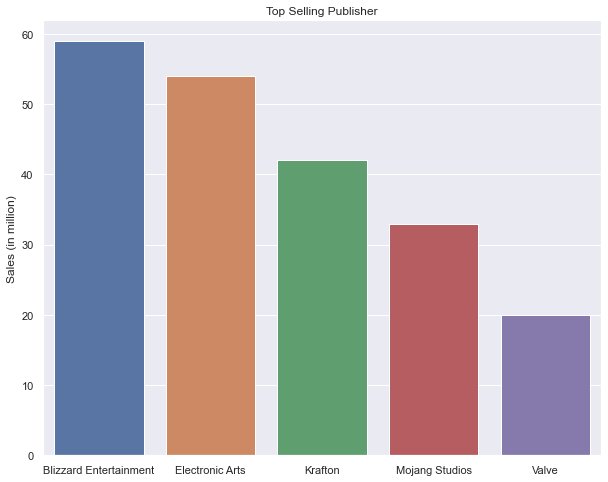

In [17]:
plot_limit = df.groupby('Publisher')['Sales'].sum().sort_values(ascending=False).index.values
sns.barplot(x='Publisher',y='Sales',data=df_by_publisher,order=plot_limit[0:5])
plt.ylabel("Sales (in million)")
plt.xlabel('')
plt.title("Top Selling Publisher")
plt.show()

Blizzard Entertainment is the top selling publisher

## Top Selling Developer

In [18]:
df_by_developer = df.groupby('Developer',as_index=False)['Sales'].sum()
df_by_developer = df_by_developer.sort_values(by='Sales',ascending=False)
df_by_developer

,Developer,Sales
6,Blizzard Entertainment,58.0
69,PUBG Studios,42.0
65,Mojang Studios,33.0
60,Maxis,33.0
34,Facepunch Studios,29.0
...,...,...
80,SCE Cambridge Studio,1.0
40,Galactic Cafe,1.0
31,Enlight Software,1.0
84,Softstar,1.0


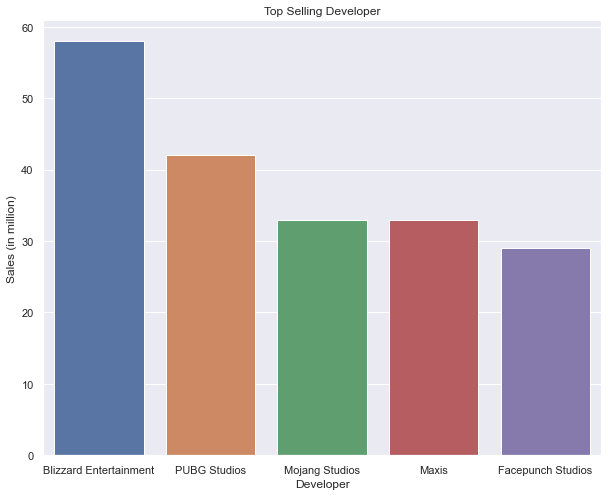

In [19]:
plot_limit = df.groupby('Developer')['Sales'].sum().sort_values(ascending=False).index.values
sns.barplot(x='Developer',y='Sales',data= df_by_developer,order=plot_limit[0:5])
plt.ylabel("Sales (in million)")
plt.title("Top Selling Developer")
plt.show()

Blizzard Entertainment is the top selling developer